In [53]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [36]:
import sympy as sp
sp.init_printing()

## Calculating Compound Interest

B = balance  
P = principal  
r = APR  
n = number of compoundings per year  
t = number of years  
c = contribution per compounding interval  

\begin{equation}
B = P\left(1 + \frac{r}{n}\right)^{nt} + c\frac{\left[(1 + \frac{r}{n})^{(nt + 1)} - (1 + \frac{r}{n})\right]}{(\frac{r}{n})}
\end{equation}

In [57]:
P = 20000
APR = .02
m = 12
r = APR/m
c = 1500

def balance(principal, contribution, rate, noPeriods):
    return principal*(1+rate)**noPeriods + contribution*((1+rate)**(noPeriods + 1) - (1+rate))/rate

In [58]:
balance(P, c, r, 60)

116830.23079815248

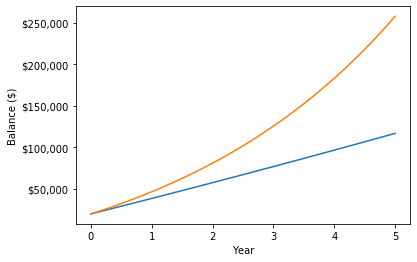

In [64]:
noYears = 5
x = np.linspace(0,noYears)
fig, ax = plt.subplots()
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.plot(x,balance(P, c, r, x*12))
ax.plot(x,balance(P, c, r+.02, x*12))
plt.xlabel("Year")
plt.ylabel("Balance ($)")
plt.show()

In [88]:
class account:
    _registry = []
    
    @classmethod
    def listAccounts(cls):
        for acct in cls._registry:
            print(acct.name)
            
    @classmethod
    def plotAccounts(cls, noYears):
        t = np.linspace(0, noYears)
        plt.figure()
        for acct in cls._registry:
            plt.plot(t, acct.calcBalance(t))
            
        plt.show()
        
    @classmethod
    def stackAccounts(cls, noYears):
        t = np.linspace(0, noYears)
        
        fig, ax = plt.subplots()
        fmt = '${x:,.0f}'
        tick = mtick.StrMethodFormatter(fmt)
        ax.yaxis.set_major_formatter(tick)
        ax.set_xlabel("Years")
        ax.set_ylabel("Balance") 
        
        # create a dummy account that always holds zero balance, being sure to avoid divide-by-zeros
        prev_acct = account("zeros", "savings", 0, 1, 0, 12, 0, 0) 
        for acct in cls._registry:
            ax.fill_between(t, acct.calcBalance(t) + prev_acct.calcBalance(t), prev_acct.calcBalance(t))
            prev_acct = acct

        del prev_acct
        plt.show()
            
    numberOfAccounts = 0
    
    acctTypes = ('savings','investment')
    
    def __init__(self, name, accountType, principal, APR, APRvar, compPerYear, contribution, contPerYear):
        
        self.name = name
        self.accountType = accountType
        self.principal = principal
        self.APR = APR
        self.APRvar = APRvar
        self.compPerYear = compPerYear #number of compounding periods per year
        self.contribution = contribution
        self.contPerYear = contPerYear #number of contributions per year
        
        if accountType not in self.acctTypes:
            raise ValueError("%s is not a valid account type." % accountType)
        
        if (principal < 0):
            raise ValueError("Principal must be a positive number")
        
        self._registry.append(self)
        type(self).numberOfAccounts += 1
    
    def __del__(self):
        self._registry.insert(0,self)
        if type(self).numberOfAccounts > 0:
            type(self).numberOfAccounts -= 1
        
    def calcBalance(self,noYears,variance=0):
        P = self.principal
        r = (self.APR + variance)/100
        n = self.compPerYear
        t = noYears
        c = self.contribution*self.contPerYear/self.compPerYear
        
        balance = P*(1 + r/n)**(n*t) + c*((1 + r/n)**(n*t + 1) - (1 + r/n))/(r/n)
        
        return balance
    
    def plotAccount(self,noYears):
        t = np.linspace(0, noYears)
        
        #accountGraph = plt.figure()
        
        fig, ax = plt.subplots()
        fmt = '${x:,.0f}'
        tick = mtick.StrMethodFormatter(fmt)
        ax.yaxis.set_major_formatter(tick)
        ax.plot(t, self.calcBalance(t))
        ax.set_xlabel("Years")
        ax.set_ylabel("Balance")   
        
        if(self.APRvar != 0):
            ax.plot(t, self.calcBalance(t, self.APRvar),linestyle='dashed')
            ax.plot(t, self.calcBalance(t, -self.APRvar),linestyle='dashed')
            ax.legend(('nominal','best case','worst case'))
         
        plt.show()
        #return ax

In [3]:
test = account("test","checking", 0, 0, 0, 0, 500, 26)

ValueError: checking is not a valid account type.

In [4]:
test = account("test","savings", -10, 0, 0, 0, 100, 'weekly')

ValueError: Principal must be a positive number

In [89]:
CapOne = account("CapOne", "savings", 20000, 2, 0, 12, 1500, 12)
Betterment = account("Betterment", "investment", 20000, 7, 0.25, 12, 750, 26)
account.numberOfAccounts

2

In [8]:
del Betterment

In [18]:
account.numberOfAccounts

0

In [4]:
for a in account._registry:
    print(a.name)

CapOne
Betterment


In [5]:
account.listAccounts()

CapOne
Betterment


In [22]:
CapOne.APR

2

In [6]:
CapOne.calcBalance(5)

116830.23079815248

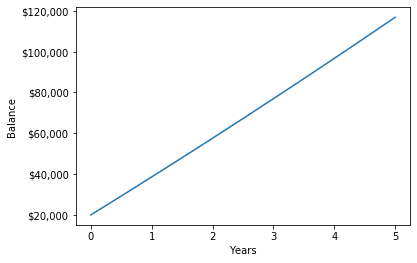

In [90]:
CapOne.plotAccount(5)

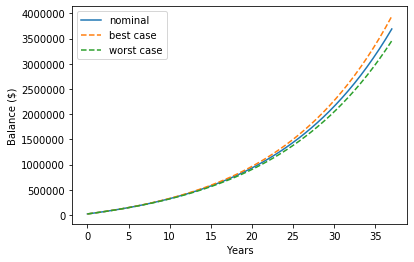

In [8]:
Betterment.plotAccount(37)

## Next steps
* [x] stack multiple accounts (use fill_between)
* [ ] group accounts by type
* [ ] add graph cursor
* [ ] add goal list

Can use calcBalance to compare returns with and without an account management fee:

In [36]:
print(Betterment.calcBalance(37))
print(Betterment.calcBalance(37,-0.25))

3691355.077923718
3456560.466354699


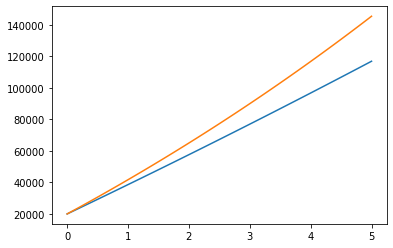

In [20]:
account.plotAccounts(5)

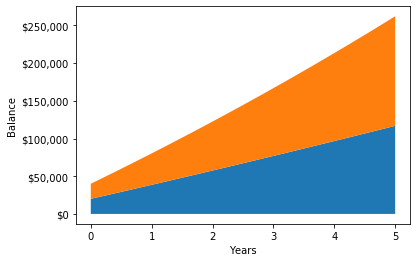

In [87]:
account.stackAccounts(5)